In [1]:
#!pip install python-dotenv



In [2]:
#!pip install vaderSentiment

In [3]:
import pandas as pd
import os
from dotenv import load_dotenv
import json
import re
import requests
from extract_reddit_data import RedditAPI
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


[nltk_data] Downloading package punkt to /Users/aryasmc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aryasmc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
from extract_reddit_data import RedditAPI

In [5]:
reddit_api = RedditAPI()
cryptocurrency = reddit_api.get_crypto_curr_data()
cryptomarkets = reddit_api.get_crypto_markets_data()
bitcoin = reddit_api.get_bitcoin_data()
eth= reddit_api.get_eth_data()
binance = reddit_api.get_binance_data()
solana = reddit_api.get_solana_data()
ripple = reddit_api.get_ripple_data()
cardano = reddit_api.get_cardano_data()
tronix = reddit_api.get_tronix_data()
chainlink = reddit_api.get_chainlink_data()

## understand the Databases 


In [6]:
def print_dataframe_shape(df, name):
    rows, columns = df.shape
    print(f"{name} database has {rows} rows and {columns} columns.")

print_dataframe_shape(cryptocurrency, "Cryptocurrency")
print_dataframe_shape(cryptomarkets, "Crypto Markets")
print_dataframe_shape(bitcoin, "Bitcoin")
print_dataframe_shape(eth, "Ethereum")
print_dataframe_shape(binance, "Binance")
print_dataframe_shape(solana, "Solana")
print_dataframe_shape(ripple, "Ripple")
print_dataframe_shape(cardano, "Cardano")
print_dataframe_shape(tronix, "Tronix")
print_dataframe_shape(chainlink, "Chainlink")

Cryptocurrency database has 102 rows and 9 columns.
Crypto Markets database has 101 rows and 9 columns.
Bitcoin database has 102 rows and 9 columns.
Ethereum database has 100 rows and 9 columns.
Binance database has 101 rows and 9 columns.
Solana database has 101 rows and 9 columns.
Ripple database has 102 rows and 9 columns.
Cardano database has 102 rows and 9 columns.
Tronix database has 100 rows and 9 columns.
Chainlink database has 100 rows and 9 columns.


In [7]:
def dataframe_description(df, name):
    print(f"{name} description:")
    info = df.describe()
    return info

# Print description for each DataFrame
print(dataframe_description(cryptocurrency, "Cryptocurrency"))
print(dataframe_description(cryptomarkets, "Crypto Markets"))
print(dataframe_description(bitcoin, "Bitcoin"))
print(dataframe_description(eth, "Ethereum"))
print(dataframe_description(binance, "Binance"))
print(dataframe_description(solana, "Solana"))
print(dataframe_description(ripple, "Ripple"))
print(dataframe_description(cardano, "Cardano"))
print(dataframe_description(tronix, "Tronix"))
print(dataframe_description(chainlink, "Chainlink"))

Cryptocurrency description:
       upvote_ratio         ups  downs       score
count    102.000000  102.000000  102.0  102.000000
mean       0.663039   63.137255    0.0   63.137255
std        0.203406  100.355511    0.0  100.355511
min        0.130000    0.000000    0.0    0.000000
25%        0.552500    1.250000    0.0    1.250000
50%        0.690000   16.000000    0.0   16.000000
75%        0.837500   71.000000    0.0   71.000000
max        0.960000  421.000000    0.0  421.000000
Crypto Markets description:
       upvote_ratio         ups  downs       score
count    101.000000  101.000000  101.0  101.000000
mean       0.818713    6.257426    0.0    6.257426
std        0.219005   19.819008    0.0   19.819008
min        0.180000    0.000000    0.0    0.000000
25%        0.680000    1.000000    0.0    1.000000
50%        0.920000    2.000000    0.0    2.000000
75%        1.000000    5.000000    0.0    5.000000
max        1.000000  190.000000    0.0  190.000000
Bitcoin description:
     

In [8]:
def missing_values(df, name):
    print(f"{name} number of missing values:")
    missing_values = df.isna().sum()
    print(missing_values)
    return missing_values

# Checking missing values for each DataFrame
print(missing_values(cryptocurrency, "Cryptocurrency"))
print(missing_values(cryptomarkets, "Crypto Markets"))
print(missing_values(bitcoin, "Bitcoin"))
print(missing_values(eth, "Ethereum"))
print(missing_values(binance, "Binance"))
print(missing_values(solana, "Solana"))
print(missing_values(ripple, "Ripple"))
print(missing_values(cardano, "Cardano"))
print(missing_values(tronix, "Tronix"))
print(missing_values(chainlink, "Chainlink"))

Cryptocurrency number of missing values:
approved_date    102
thread_id          0
subreddit          0
title              0
body               0
upvote_ratio       0
ups                0
downs              0
score              0
dtype: int64
approved_date    102
thread_id          0
subreddit          0
title              0
body               0
upvote_ratio       0
ups                0
downs              0
score              0
dtype: int64
Crypto Markets number of missing values:
approved_date    101
thread_id          0
subreddit          0
title              0
body               0
upvote_ratio       0
ups                0
downs              0
score              0
dtype: int64
approved_date    101
thread_id          0
subreddit          0
title              0
body               0
upvote_ratio       0
ups                0
downs              0
score              0
dtype: int64
Bitcoin number of missing values:
approved_date    102
thread_id          0
subreddit          0
title        

In [9]:
def clean_body_column(df, name):
    print(f"Cleaning 'body' column for {name} database.")
    # Replace empty strings with NaN
    df['body'].replace('', np.nan, inplace=True)
    # Drop rows with NaN values in the 'body' column
    df.dropna(subset=['body'], inplace=True)
    print(f"Number of rows after cleaning: {len(df)}")
    return df

# Cleaning 'body' column for each DataFrame
cryptocurrency = clean_body_column(cryptocurrency, "Cryptocurrency")
cryptomarkets = clean_body_column(cryptomarkets, "Crypto Markets")
bitcoin = clean_body_column(bitcoin, "Bitcoin")
eth = clean_body_column(eth, "Ethereum")
binance = clean_body_column(binance, "Binance")
solana = clean_body_column(solana, "Solana")
ripple = clean_body_column(ripple, "Ripple")
cardano = clean_body_column(cardano, "Cardano")
tronix = clean_body_column(tronix, "Tronix")
chainlink = clean_body_column(chainlink, "Chainlink")

Cleaning 'body' column for Cryptocurrency database.
Number of rows after cleaning: 44
Cleaning 'body' column for Crypto Markets database.
Number of rows after cleaning: 41
Cleaning 'body' column for Bitcoin database.
Number of rows after cleaning: 72
Cleaning 'body' column for Ethereum database.
Number of rows after cleaning: 69
Cleaning 'body' column for Binance database.
Number of rows after cleaning: 84
Cleaning 'body' column for Solana database.
Number of rows after cleaning: 91
Cleaning 'body' column for Ripple database.
Number of rows after cleaning: 90
Cleaning 'body' column for Cardano database.
Number of rows after cleaning: 49
Cleaning 'body' column for Tronix database.
Number of rows after cleaning: 76
Cleaning 'body' column for Chainlink database.
Number of rows after cleaning: 65


In [10]:
def drop_approved_date_column(df, name):
    if 'approved_date' in df.columns:
        df = df.drop(columns=['approved_date'])
        print(f"'approved_date' column removed from {name} database.")
    else:
        print(f"No 'approved_date' column found in {name} database.")
    return df

# Dropping 'approved_date' column from each DataFrame
cryptocurrency = drop_approved_date_column(cryptocurrency, "Cryptocurrency")
cryptomarkets = drop_approved_date_column(cryptomarkets, "Crypto Markets")
bitcoin = drop_approved_date_column(bitcoin, "Bitcoin")
eth = drop_approved_date_column(eth, "Ethereum")
binance = drop_approved_date_column(binance, "Binance")
solana = drop_approved_date_column(solana, "Solana")
ripple = drop_approved_date_column(ripple, "Ripple")
cardano = drop_approved_date_column(cardano, "Cardano")
tronix = drop_approved_date_column(tronix, "Tronix")
chainlink = drop_approved_date_column(chainlink, "Chainlink")

'approved_date' column removed from Cryptocurrency database.
'approved_date' column removed from Crypto Markets database.
'approved_date' column removed from Bitcoin database.
'approved_date' column removed from Ethereum database.
'approved_date' column removed from Binance database.
'approved_date' column removed from Solana database.
'approved_date' column removed from Ripple database.
'approved_date' column removed from Cardano database.
'approved_date' column removed from Tronix database.
'approved_date' column removed from Chainlink database.


In [11]:
def duplicated_dataframe(df, name):
    duplicate = df.duplicated().sum()
    print(f"{name} has {duplicate} duplicate values.")

# Checking duplicate for each DataFrame
duplicated_dataframe(cryptocurrency, "Cryptocurrency")
duplicated_dataframe(cryptomarkets, "Crypto Markets")
duplicated_dataframe(bitcoin, "Bitcoin")
duplicated_dataframe(eth, "Ethereum")
duplicated_dataframe(binance, "Binance")
duplicated_dataframe(solana, "Solana")
duplicated_dataframe(ripple, "Ripple")
duplicated_dataframe(cardano, "Cardano")
duplicated_dataframe(tronix, "Tronix")
duplicated_dataframe(chainlink, "Chainlink")

Cryptocurrency has 0 duplicate values.
Crypto Markets has 0 duplicate values.
Bitcoin has 0 duplicate values.
Ethereum has 0 duplicate values.
Binance has 0 duplicate values.
Solana has 0 duplicate values.
Ripple has 0 duplicate values.
Cardano has 0 duplicate values.
Tronix has 0 duplicate values.
Chainlink has 0 duplicate values.


## Exploratory Data Analysis (EDA):

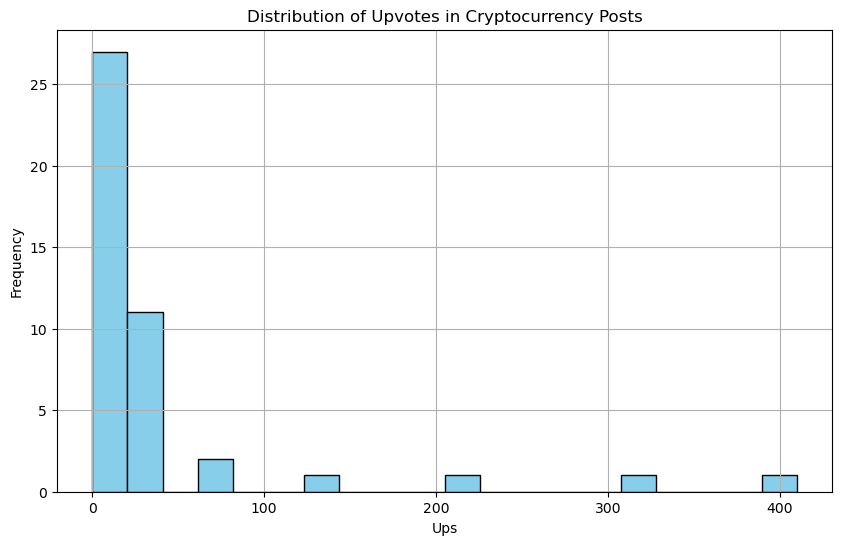

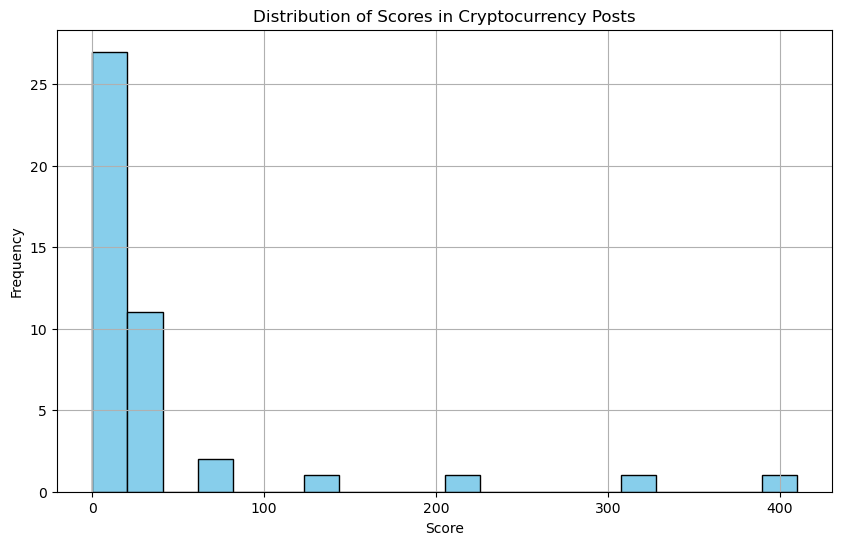

In [12]:
def plot_distribution(data, column, title):
    plt.figure(figsize=(10, 6))
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot distribution of upvotes and scores for each cryptocurrency
plot_distribution(cryptocurrency, 'ups', 'Distribution of Upvotes in Cryptocurrency Posts')
plot_distribution(cryptocurrency, 'score', 'Distribution of Scores in Cryptocurrency Posts')


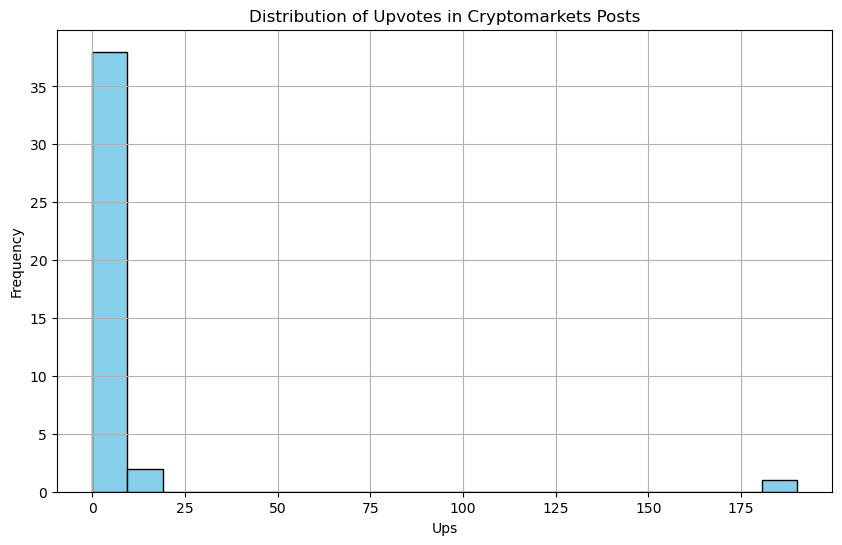

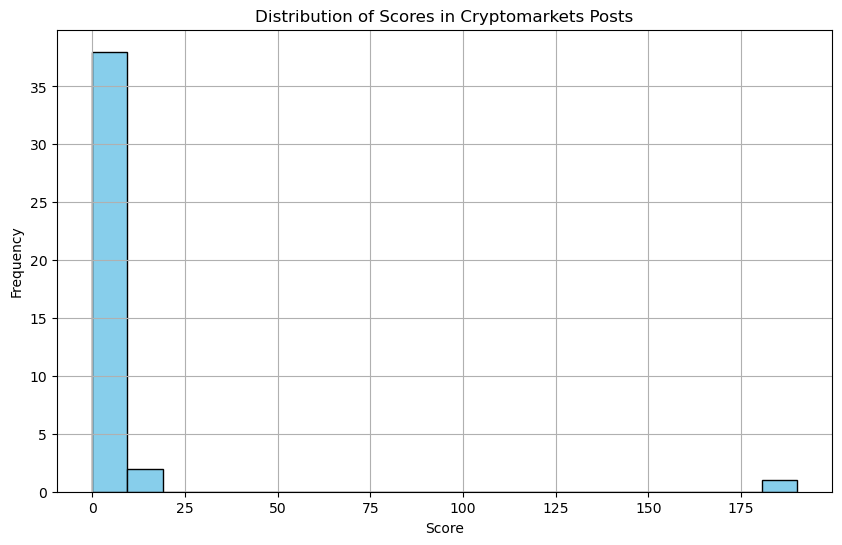

In [13]:
plot_distribution(cryptomarkets, 'ups', 'Distribution of Upvotes in Cryptomarkets Posts')
plot_distribution(cryptomarkets, 'score', 'Distribution of Scores in Cryptomarkets Posts')

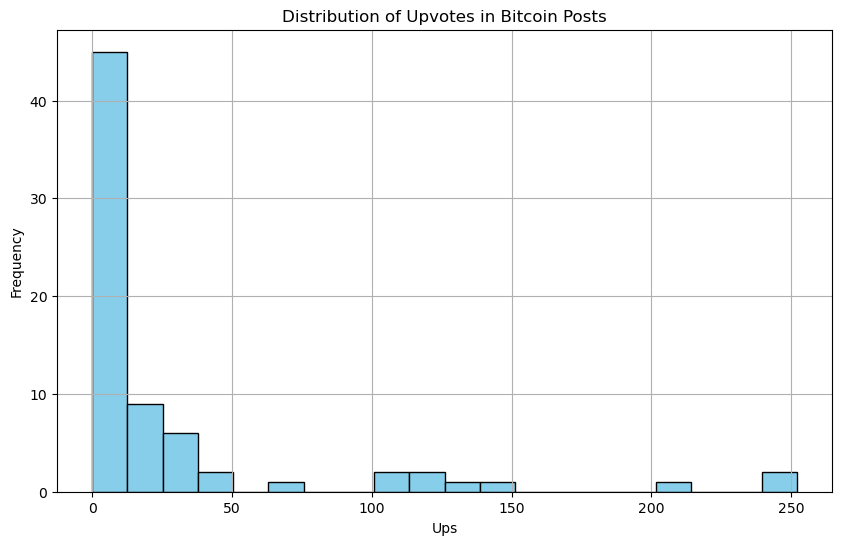

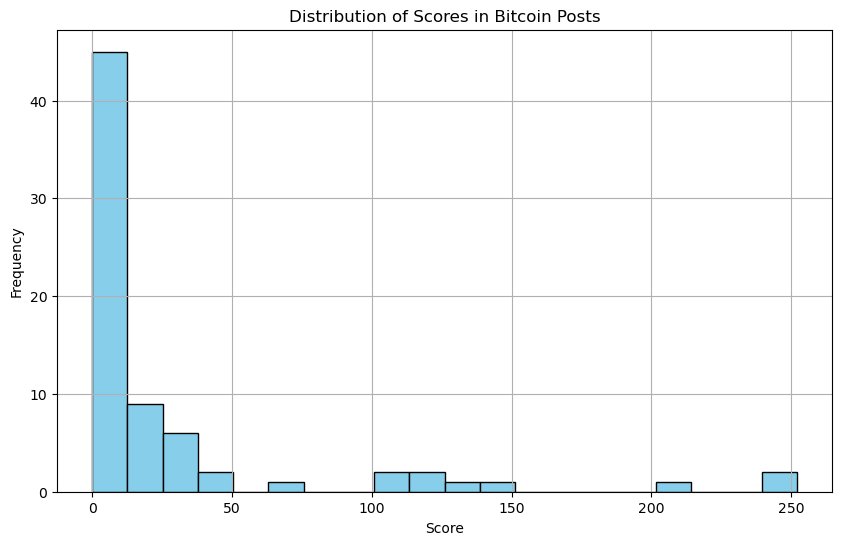

In [14]:
plot_distribution(bitcoin, 'ups', 'Distribution of Upvotes in Bitcoin Posts')
plot_distribution(bitcoin, 'score', 'Distribution of Scores in Bitcoin Posts')

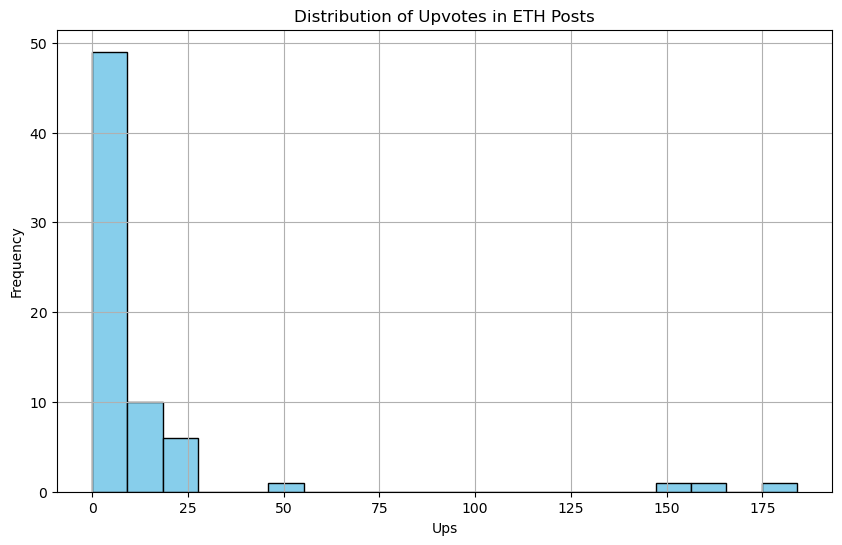

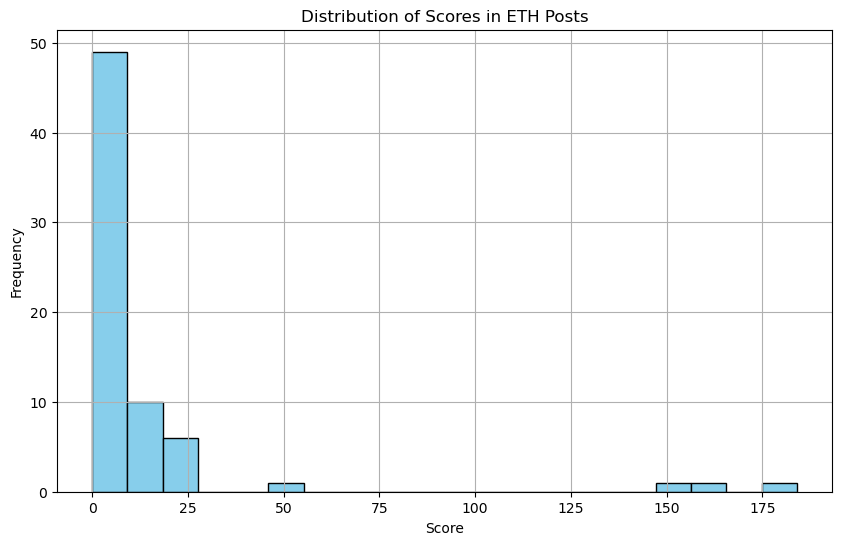

In [15]:
plot_distribution(eth, 'ups', 'Distribution of Upvotes in ETH Posts')
plot_distribution(eth, 'score', 'Distribution of Scores in ETH Posts')

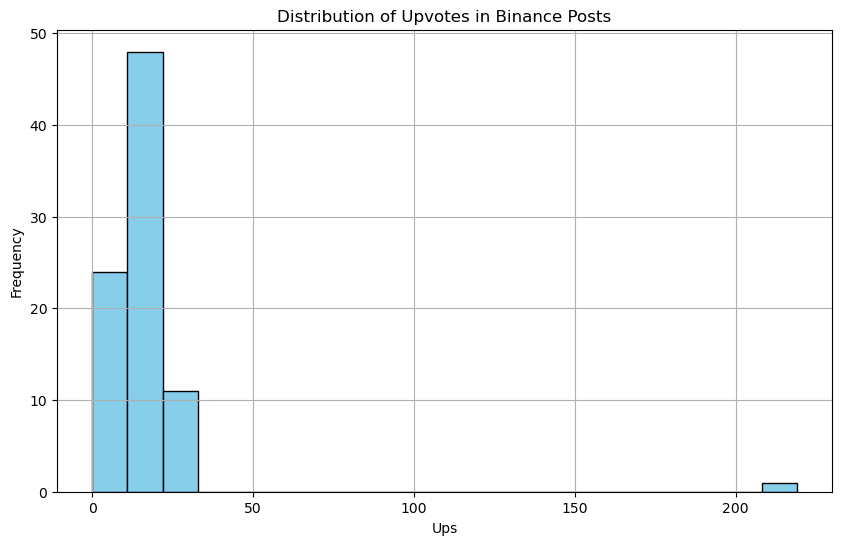

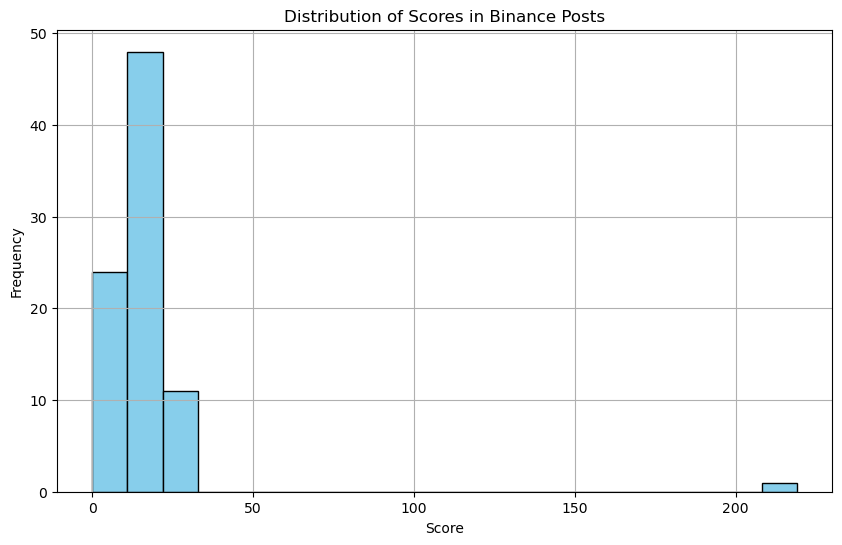

In [16]:
plot_distribution(binance, 'ups', 'Distribution of Upvotes in Binance Posts')
plot_distribution(binance, 'score', 'Distribution of Scores in Binance Posts')

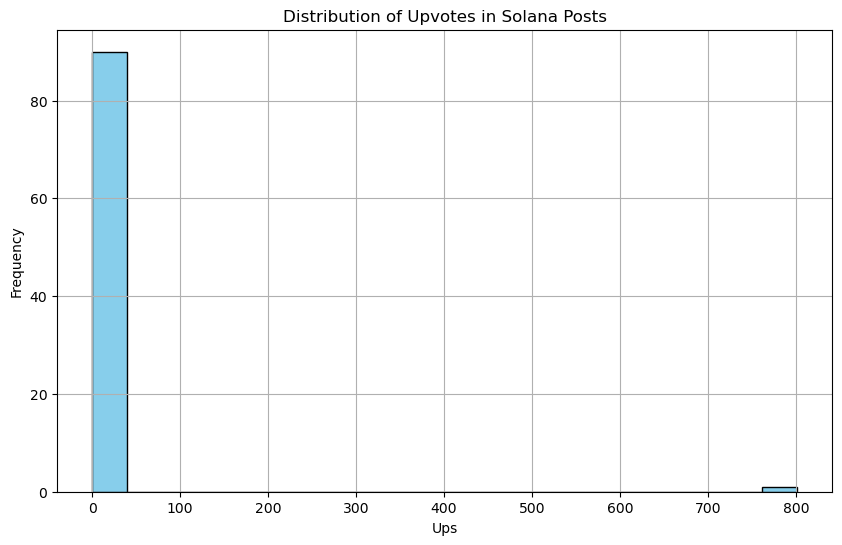

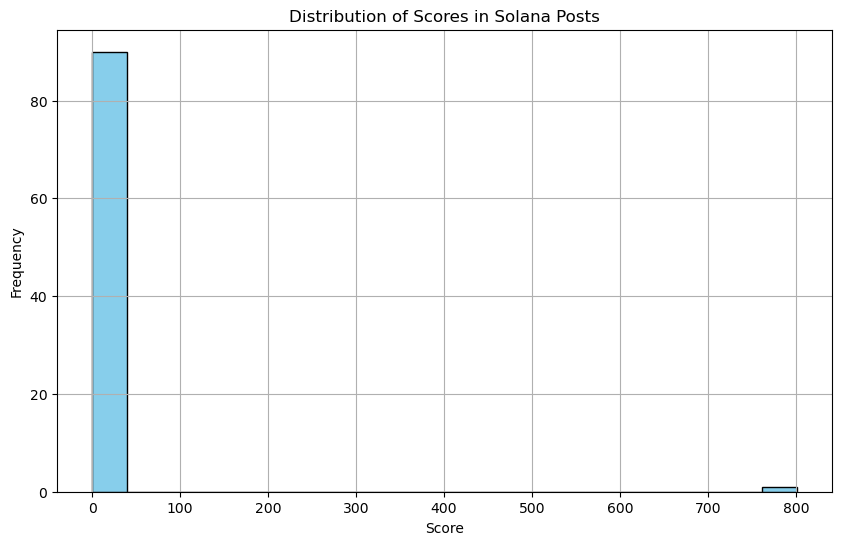

In [17]:
plot_distribution(solana, 'ups', 'Distribution of Upvotes in Solana Posts')
plot_distribution(solana, 'score', 'Distribution of Scores in Solana Posts')

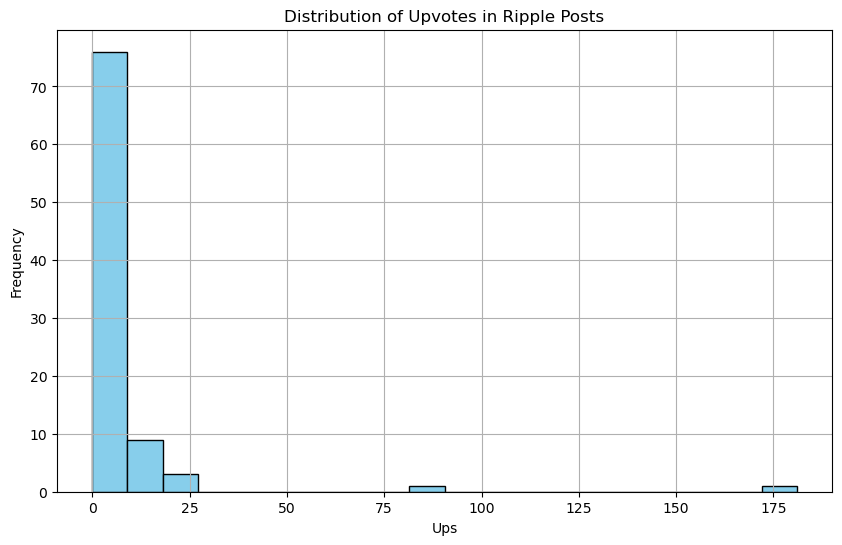

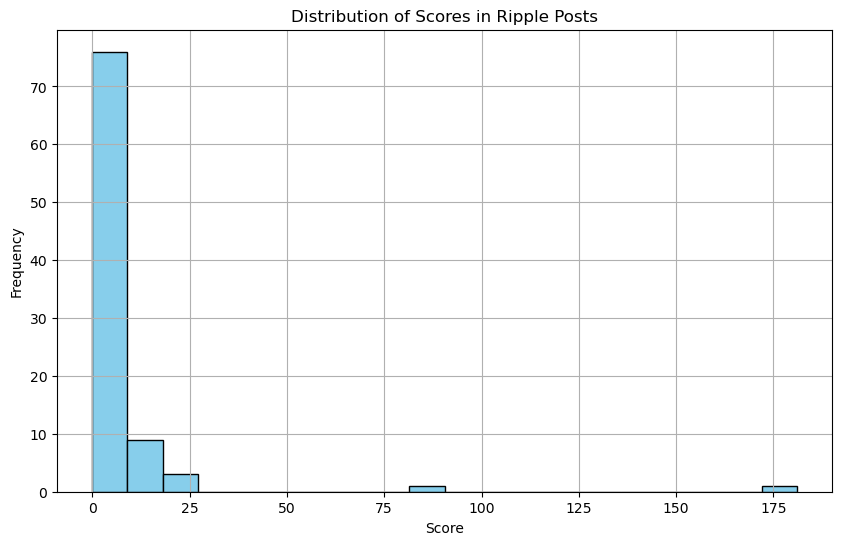

In [18]:

plot_distribution(ripple, 'ups', 'Distribution of Upvotes in Ripple Posts')
plot_distribution(ripple, 'score', 'Distribution of Scores in Ripple Posts')

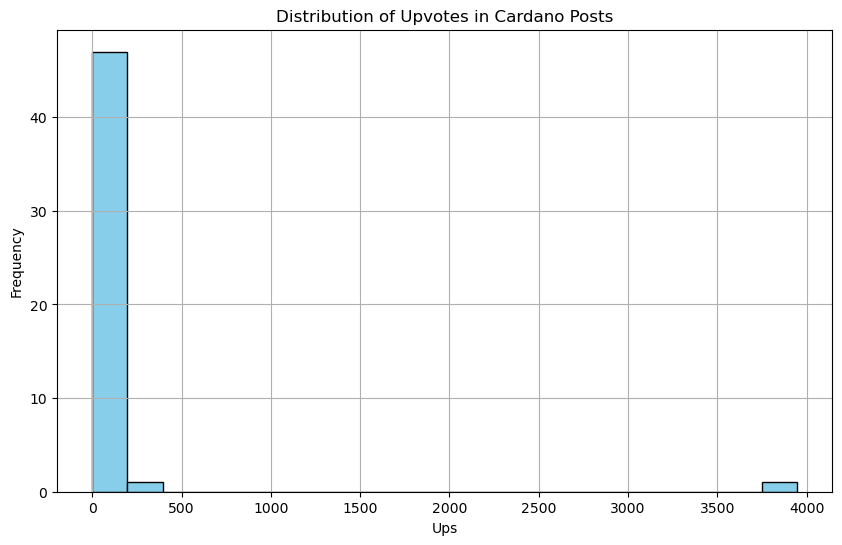

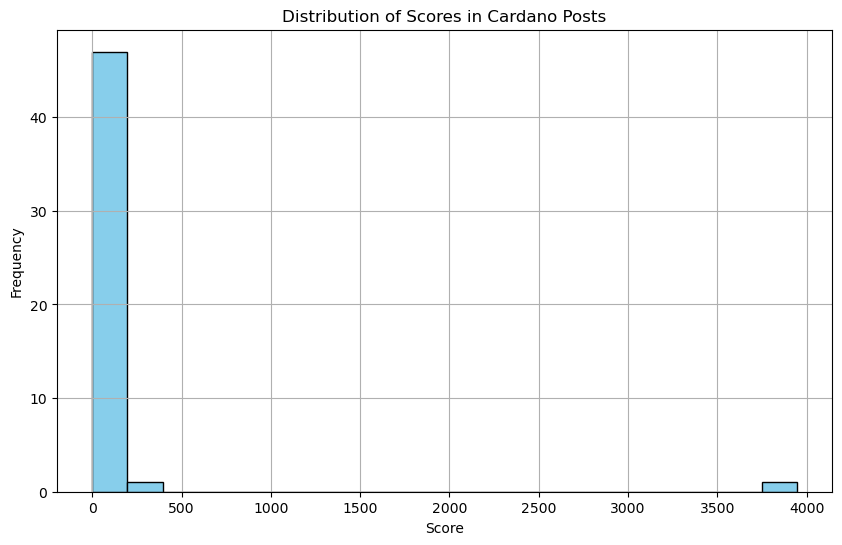

In [19]:
plot_distribution(cardano, 'ups', 'Distribution of Upvotes in Cardano Posts')
plot_distribution(cardano, 'score', 'Distribution of Scores in Cardano Posts')

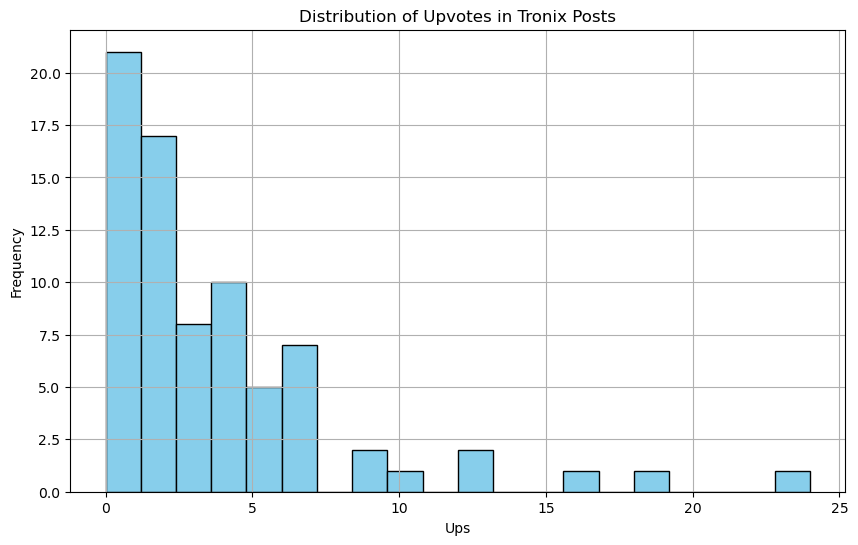

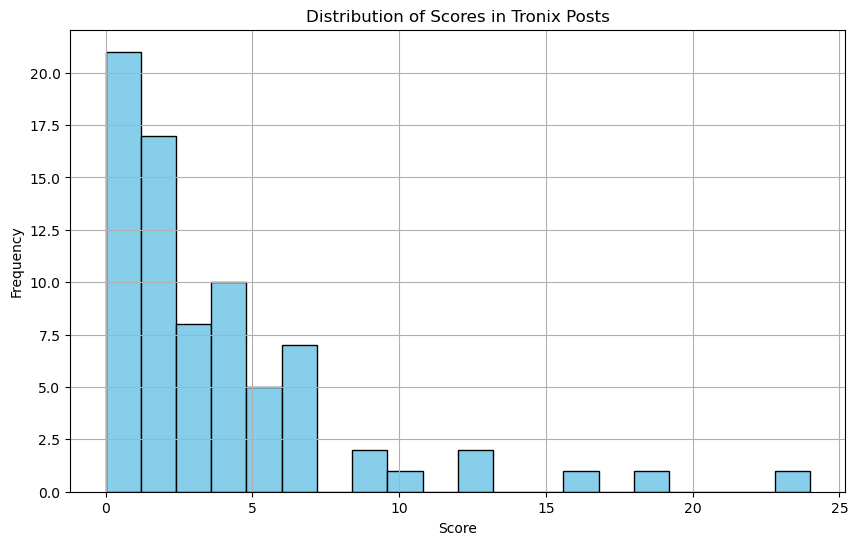

In [20]:
plot_distribution(tronix, 'ups', 'Distribution of Upvotes in Tronix Posts')
plot_distribution(tronix, 'score', 'Distribution of Scores in Tronix Posts')

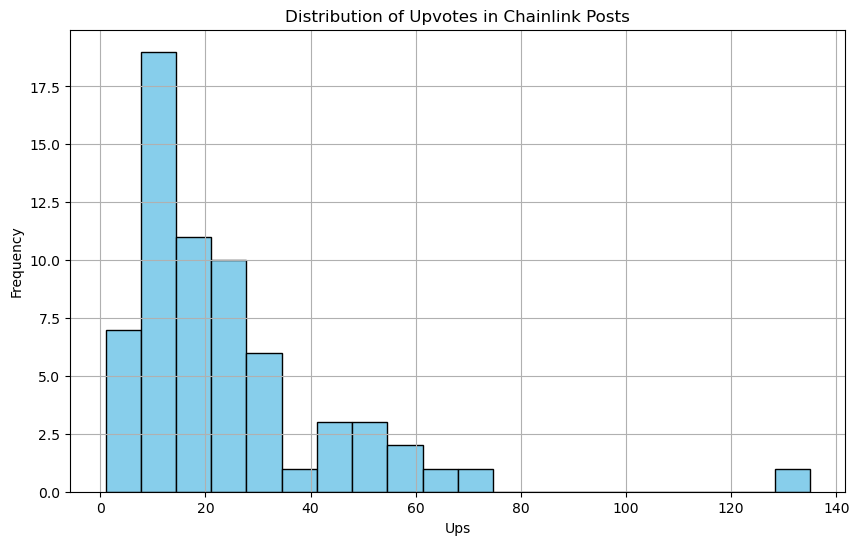

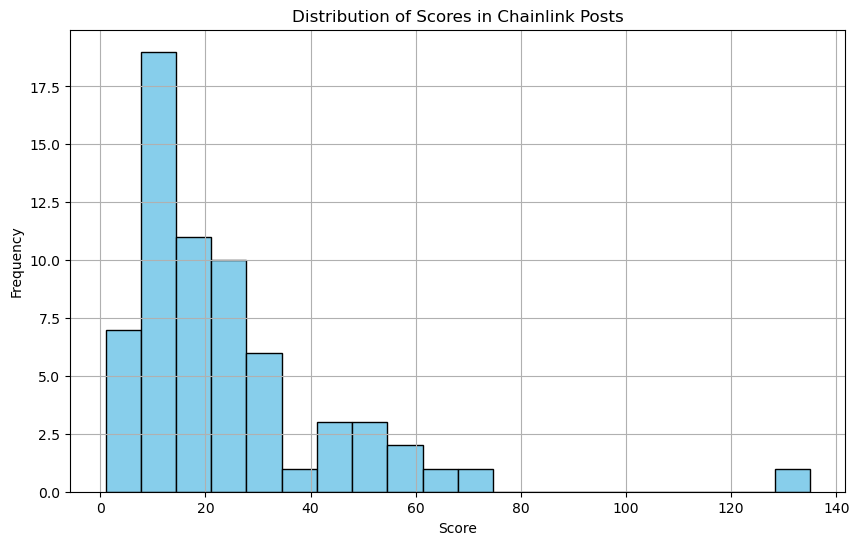

In [21]:
plot_distribution(chainlink, 'ups', 'Distribution of Upvotes in Chainlink Posts')
plot_distribution(chainlink, 'score', 'Distribution of Scores in Chainlink Posts')

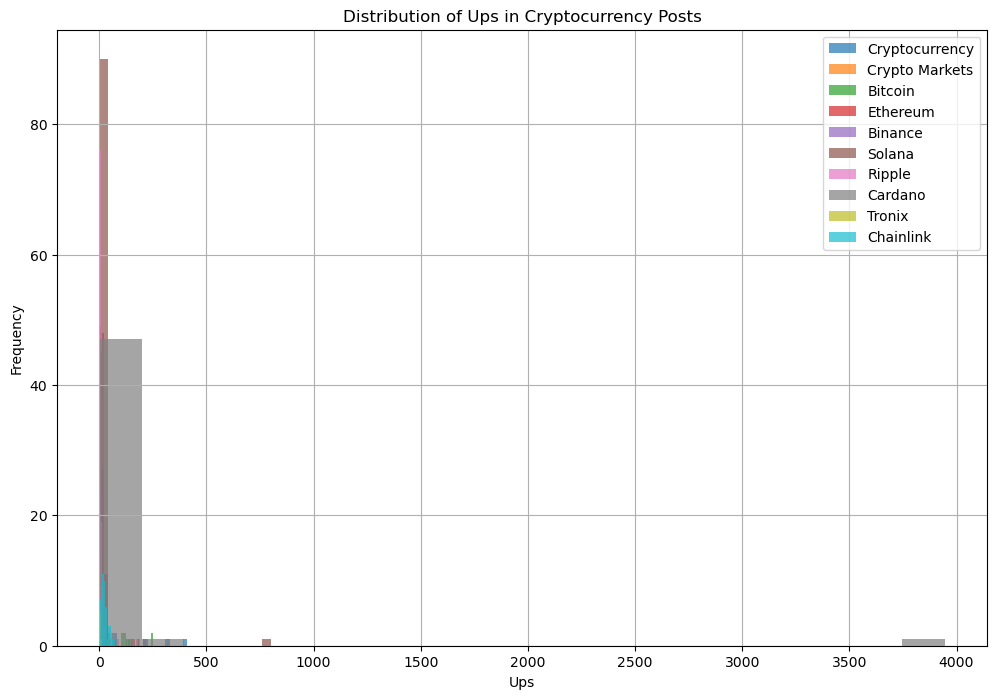

In [22]:
# Define a function to plot distribution for all cryptocurrencies
def plot_distribution_all(dataframes, column, title_prefix):
    plt.figure(figsize=(12, 8))
    for name, df in dataframes.items():
        plt.hist(df[column], bins=20, alpha=0.7, label=name)

    plt.title(f'Distribution of {column.capitalize()} in Cryptocurrency Posts')
    plt.xlabel(column.capitalize())
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot distribution of upvotes and scores for all cryptocurrencies
plot_distribution_all({
    'Cryptocurrency': cryptocurrency,
    'Crypto Markets': cryptomarkets,
    'Bitcoin': bitcoin,
    'Ethereum': eth,
    'Binance': binance,
    'Solana': solana,
    'Ripple': ripple,
    'Cardano': cardano,
    'Tronix': tronix,
    'Chainlink': chainlink
}, 'ups', 'Distribution of Upvotes')


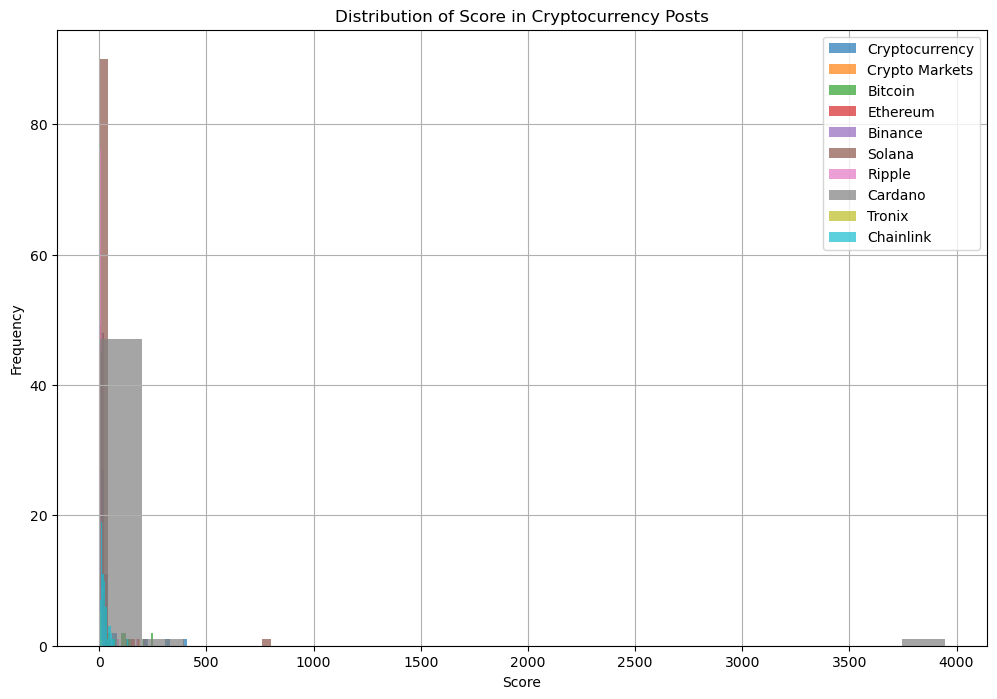

In [23]:
plot_distribution_all({
    'Cryptocurrency': cryptocurrency,
    'Crypto Markets': cryptomarkets,
    'Bitcoin': bitcoin,
    'Ethereum': eth,
    'Binance': binance,
    'Solana': solana,
    'Ripple': ripple,
    'Cardano': cardano,
    'Tronix': tronix,
    'Chainlink': chainlink
}, 'score', 'Distribution of Scores')

In [24]:
# Function to tokenize and remove stop words
def tokenize_and_remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word.lower() for word in tokens if word.isalnum() and word.lower() not in stop_words]
    return filtered_tokens

# Function to calculate word frequency for a DataFrame
def word_frequency(df, name):
    # Tokenize and remove stopwords for each post body
    tokenized_bodies = df['body'].apply(tokenize_and_remove_stopwords)
    # Flatten the list of tokenized words
    flattened_tokens = [word for sublist in tokenized_bodies for word in sublist]
    # Count the frequency of each word
    word_freq = Counter(flattened_tokens)
    # Sort the word frequency dictionary by frequency
    sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))
    
    # Print the most common words
    print(f"Top 10 most common words in {name}:")
    for word, freq in list(sorted_word_freq.items())[:10]:
        print(f"{word}: {freq}")
    print()

# Perform word frequency analysis for each cryptocurrency
word_frequency(cryptocurrency, "Cryptocurrency")
word_frequency(cryptomarkets, "Crypto Markets")
word_frequency(bitcoin, "Bitcoin")
word_frequency(eth, "Ethereum")
word_frequency(binance, "Binance")
word_frequency(solana, "Solana")
word_frequency(ripple, "Ripple")
word_frequency(cardano, "Cardano")
word_frequency(tronix, "Tronix")
word_frequency(chainlink, "Chainlink")

Top 10 most common words in Cryptocurrency:
https: 98
amp: 78
crypto: 57
would: 54
like: 32
end: 29
discussion: 28
one: 26
people: 26
information: 26

Top 10 most common words in Crypto Markets:
crypto: 40
would: 30
coin: 28
end: 28
years: 28
https: 24
since: 22
high: 18
btc: 16
2024: 15

Top 10 most common words in Bitcoin:
bitcoin: 172
https: 165
would: 48
wallet: 32
money: 29
http: 28
end: 28
one: 27
like: 27
years: 25

Top 10 most common words in Ethereum:
eth: 74
https: 68
amp: 64
ethereum: 41
crypto: 39
wallet: 37
user: 31
address: 31
users: 25
transaction: 24

Top 10 most common words in Binance:
amp: 839
please: 768
case: 768
id: 385
support: 384
us: 384
help: 384
withdrawal: 384
issues: 384
https: 324

Top 10 most common words in Solana:
https: 111
solana: 78
amp: 77
gt: 58
crypto: 29
wallet: 28
sol: 27
know: 26
like: 21
new: 20

Top 10 most common words in Ripple:
amp: 245
https: 137
gt: 123
discord: 116
x200b: 96
xrp: 79
2: 78
xrplounge: 77
3: 77
1: 76

Top 10 most common wo

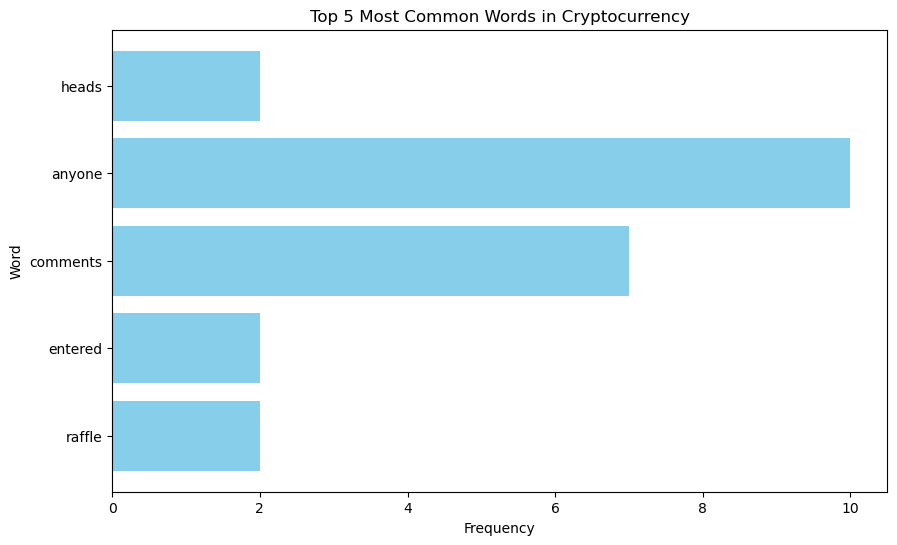

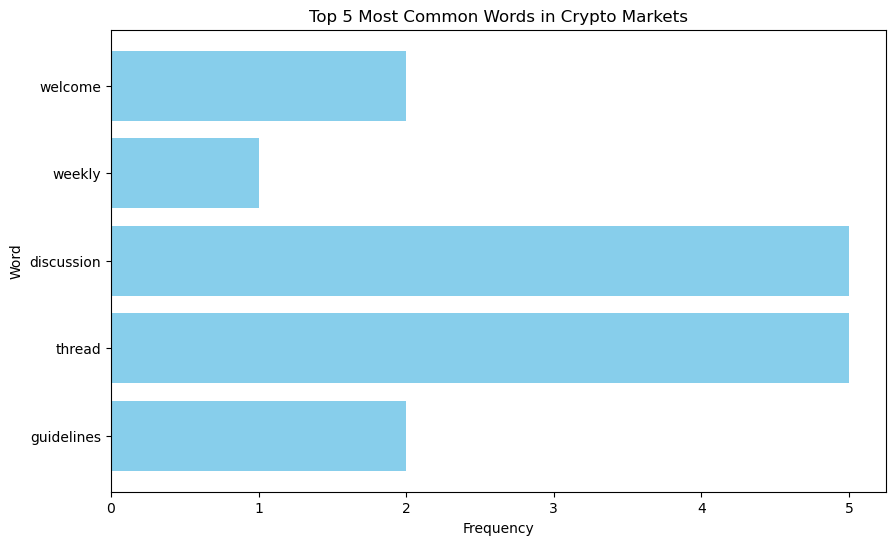

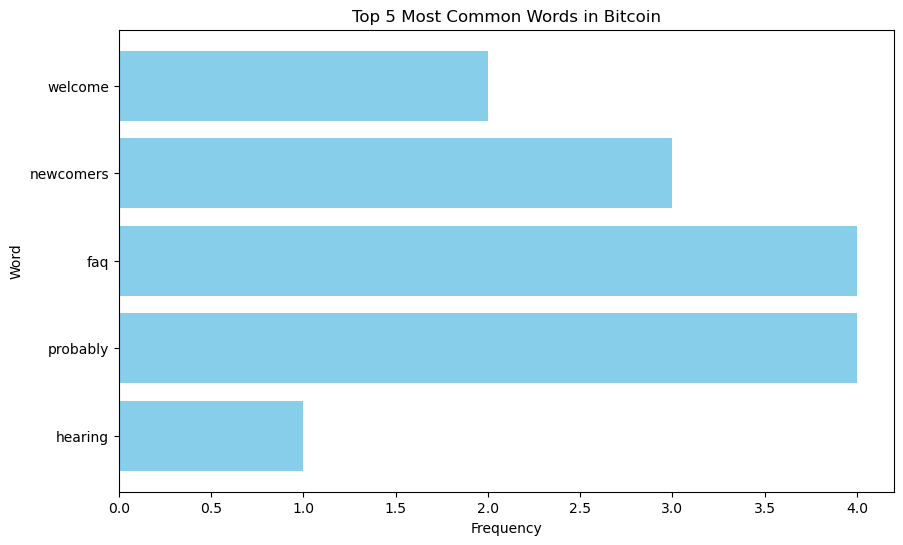

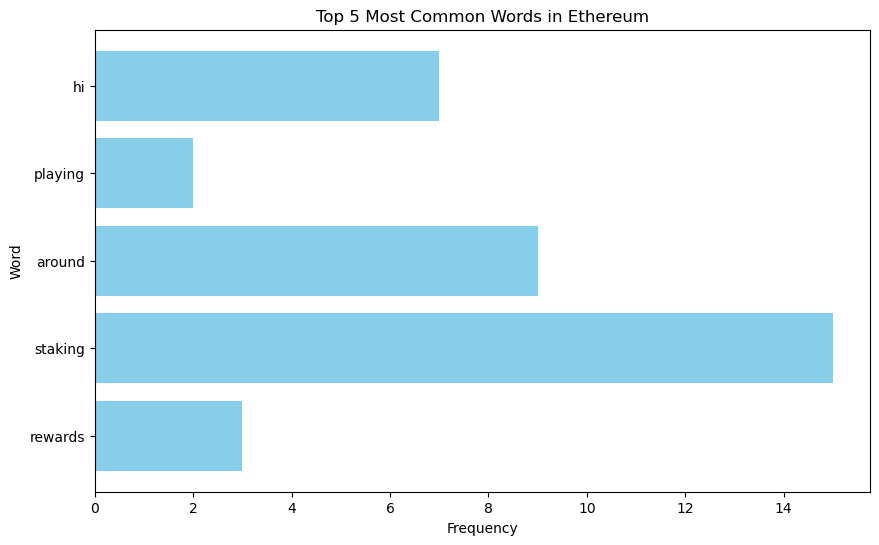

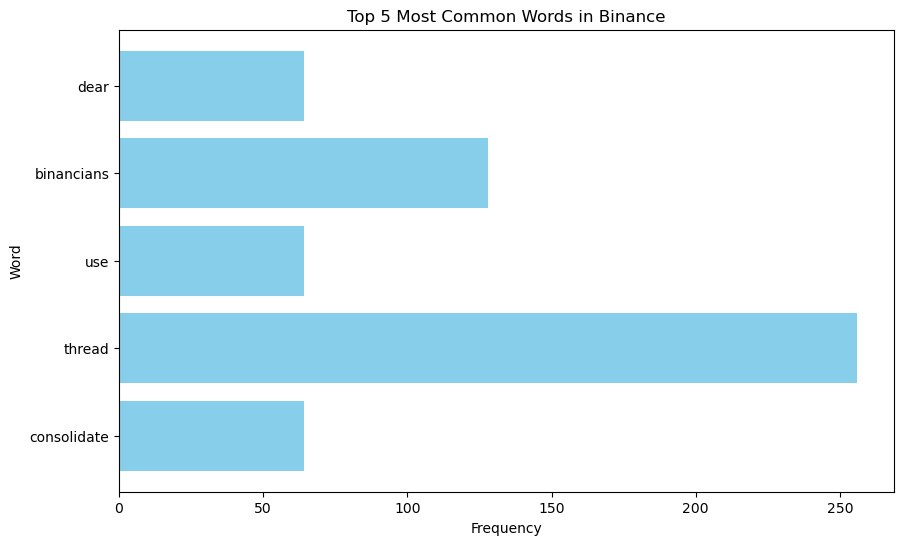

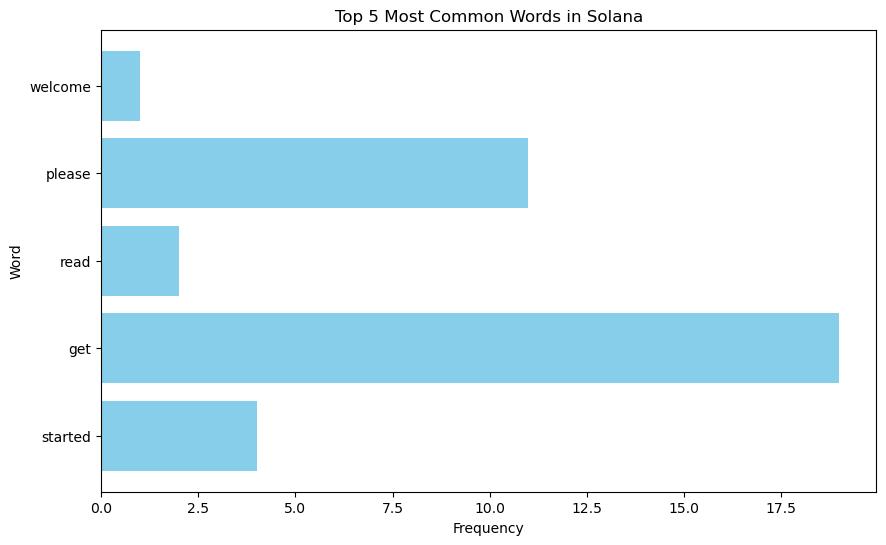

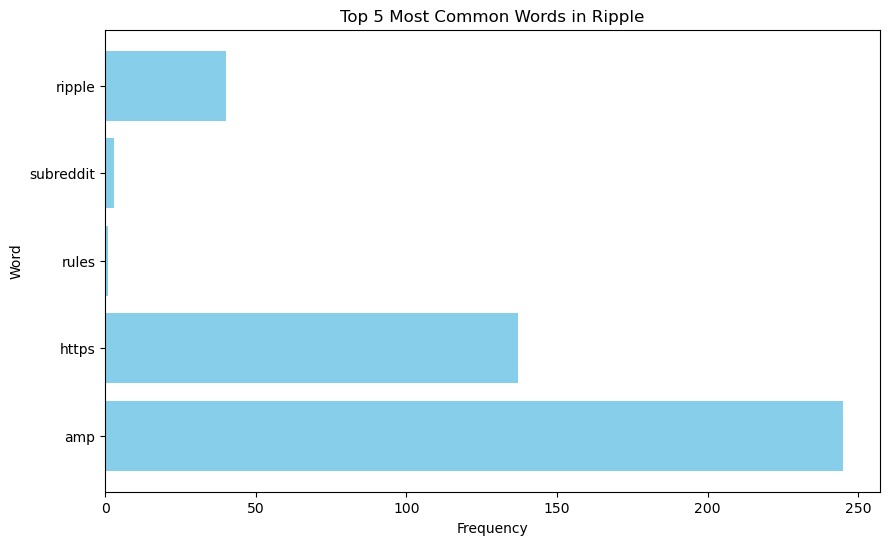

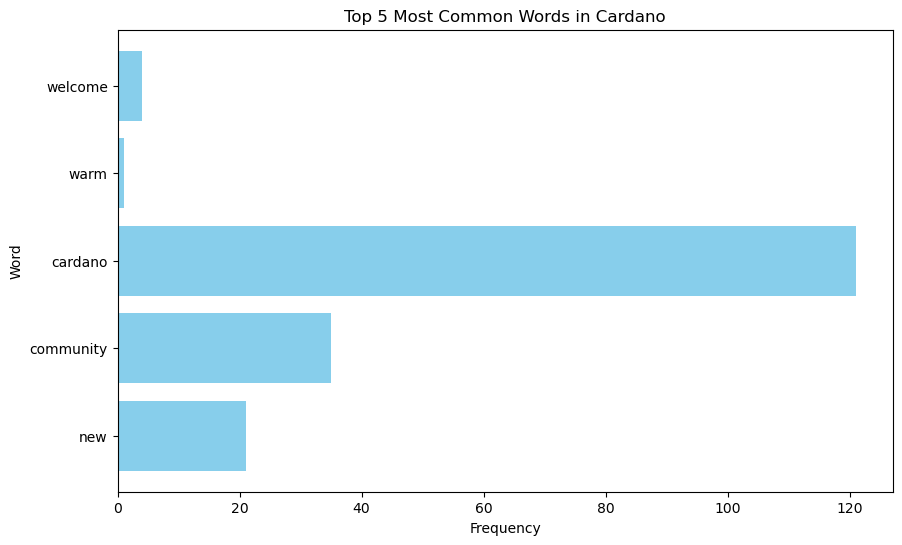

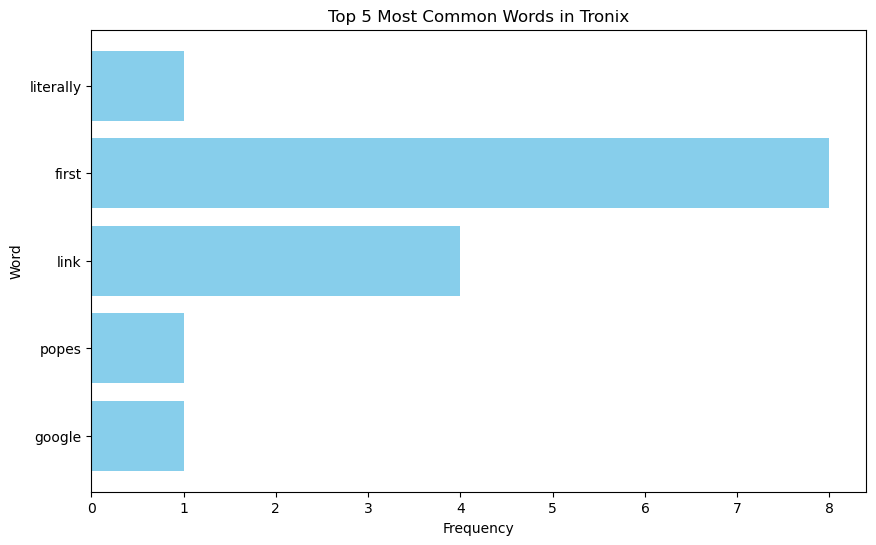

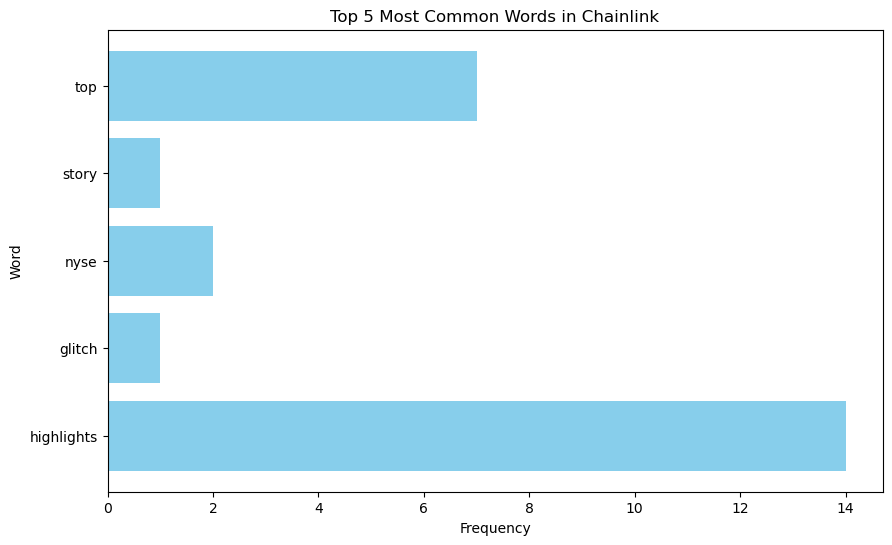

In [25]:
# Function to plot word frequency for the top N words
def plot_word_frequency(word_freq, name, top_n=5):
    top_words = list(word_freq.keys())[:top_n]
    top_freqs = list(word_freq.values())[:top_n]

    plt.figure(figsize=(10, 6))
    plt.barh(top_words, top_freqs, color='skyblue')
    plt.gca().invert_yaxis()  # Invert y-axis to have the most common words at the top
    plt.title(f'Top {top_n} Most Common Words in {name}')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()
    
# Calculate word frequency for each cryptocurrency
word_freq_cryptocurrency = Counter(tokenize_and_remove_stopwords(" ".join(cryptocurrency['body'])))
word_freq_cryptomarkets = Counter(tokenize_and_remove_stopwords(" ".join(cryptomarkets['body'])))
word_freq_bitcoin = Counter(tokenize_and_remove_stopwords(" ".join(bitcoin['body'])))
word_freq_eth = Counter(tokenize_and_remove_stopwords(" ".join(eth['body'])))
word_freq_binance = Counter(tokenize_and_remove_stopwords(" ".join(binance['body'])))
word_freq_solana = Counter(tokenize_and_remove_stopwords(" ".join(solana['body'])))
word_freq_ripple = Counter(tokenize_and_remove_stopwords(" ".join(ripple['body'])))
word_freq_cardano = Counter(tokenize_and_remove_stopwords(" ".join(cardano['body'])))
word_freq_tronix = Counter(tokenize_and_remove_stopwords(" ".join(tronix['body'])))
word_freq_chainlink = Counter(tokenize_and_remove_stopwords(" ".join(chainlink['body'])))

# Plot top 5 word frequency for each cryptocurrency
plot_word_frequency(word_freq_cryptocurrency, "Cryptocurrency", top_n=5)
plot_word_frequency(word_freq_cryptomarkets, "Crypto Markets", top_n=5)
plot_word_frequency(word_freq_bitcoin, "Bitcoin", top_n=5)
plot_word_frequency(word_freq_eth, "Ethereum", top_n=5)
plot_word_frequency(word_freq_binance, "Binance", top_n=5)
plot_word_frequency(word_freq_solana, "Solana", top_n=5)
plot_word_frequency(word_freq_ripple, "Ripple", top_n=5)
plot_word_frequency(word_freq_cardano, "Cardano", top_n=5)
plot_word_frequency(word_freq_tronix, "Tronix", top_n=5)
plot_word_frequency(word_freq_chainlink, "Chainlink", top_n=5)


In [26]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment scores for each post body
def calculate_sentiment_scores(df):
    sentiment_scores = df['body'].apply(lambda x: analyzer.polarity_scores(x))
    return sentiment_scores

# Calculate sentiment scores for each cryptocurrency
sentiment_scores_cryptocurrency = calculate_sentiment_scores(cryptocurrency)
sentiment_scores_cryptomarkets = calculate_sentiment_scores(cryptomarkets)
sentiment_scores_bitcoin = calculate_sentiment_scores(bitcoin)
sentiment_scores_eth = calculate_sentiment_scores(eth)
sentiment_scores_binance = calculate_sentiment_scores(binance)
sentiment_scores_solana = calculate_sentiment_scores(solana)
sentiment_scores_ripple = calculate_sentiment_scores(ripple)
sentiment_scores_cardano = calculate_sentiment_scores(cardano)
sentiment_scores_tronix = calculate_sentiment_scores(tronix)
sentiment_scores_chainlink = calculate_sentiment_scores(chainlink)

# Function to summarize sentiment scores
def summarize_sentiment_scores(sentiment_scores, name):
    positive_count = sum(1 for score in sentiment_scores if score['compound'] > 0)
    neutral_count = sum(1 for score in sentiment_scores if score['compound'] == 0)
    negative_count = sum(1 for score in sentiment_scores if score['compound'] < 0)
    total_count = len(sentiment_scores)

    print(f"Sentiment Analysis for {name}:")
    print(f"Positive: {positive_count}/{total_count} ({(positive_count/total_count)*100:.2f}%)")
    print(f"Neutral: {neutral_count}/{total_count} ({(neutral_count/total_count)*100:.2f}%)")
    print(f"Negative: {negative_count}/{total_count} ({(negative_count/total_count)*100:.2f}%)")

# Summarize sentiment scores for each cryptocurrency
summarize_sentiment_scores(sentiment_scores_cryptocurrency, "Cryptocurrency")
summarize_sentiment_scores(sentiment_scores_cryptomarkets, "Crypto Markets")
summarize_sentiment_scores(sentiment_scores_bitcoin, "Bitcoin")
summarize_sentiment_scores(sentiment_scores_eth, "Ethereum")
summarize_sentiment_scores(sentiment_scores_binance, "Binance")
summarize_sentiment_scores(sentiment_scores_solana, "Solana")
summarize_sentiment_scores(sentiment_scores_ripple, "Ripple")
summarize_sentiment_scores(sentiment_scores_cardano, "Cardano")
summarize_sentiment_scores(sentiment_scores_tronix, "Tronix")
summarize_sentiment_scores(sentiment_scores_chainlink, "Chainlink")

Sentiment Analysis for Cryptocurrency:
Positive: 37/44 (84.09%)
Neutral: 2/44 (4.55%)
Negative: 5/44 (11.36%)
Sentiment Analysis for Crypto Markets:
Positive: 28/41 (68.29%)
Neutral: 8/41 (19.51%)
Negative: 5/41 (12.20%)
Sentiment Analysis for Bitcoin:
Positive: 49/72 (68.06%)
Neutral: 15/72 (20.83%)
Negative: 8/72 (11.11%)
Sentiment Analysis for Ethereum:
Positive: 52/69 (75.36%)
Neutral: 5/69 (7.25%)
Negative: 12/69 (17.39%)
Sentiment Analysis for Binance:
Positive: 65/84 (77.38%)
Neutral: 1/84 (1.19%)
Negative: 18/84 (21.43%)
Sentiment Analysis for Solana:
Positive: 59/91 (64.84%)
Neutral: 12/91 (13.19%)
Negative: 20/91 (21.98%)
Sentiment Analysis for Ripple:
Positive: 37/90 (41.11%)
Neutral: 11/90 (12.22%)
Negative: 42/90 (46.67%)
Sentiment Analysis for Cardano:
Positive: 41/49 (83.67%)
Neutral: 3/49 (6.12%)
Negative: 5/49 (10.20%)
Sentiment Analysis for Tronix:
Positive: 45/76 (59.21%)
Neutral: 10/76 (13.16%)
Negative: 21/76 (27.63%)
Sentiment Analysis for Chainlink:
Positive: 43/

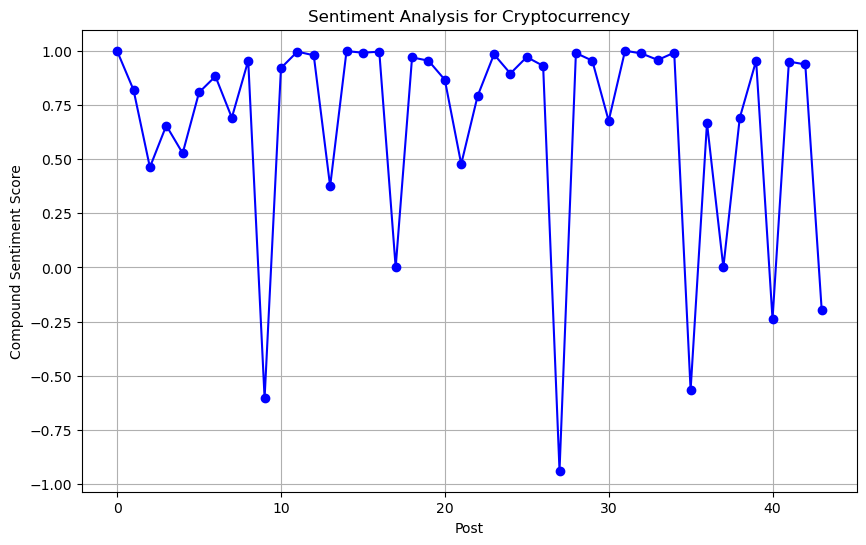

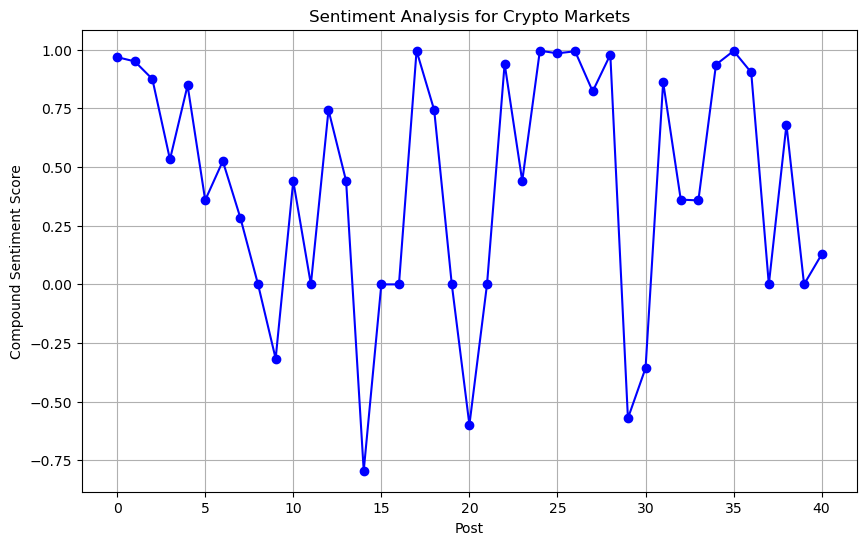

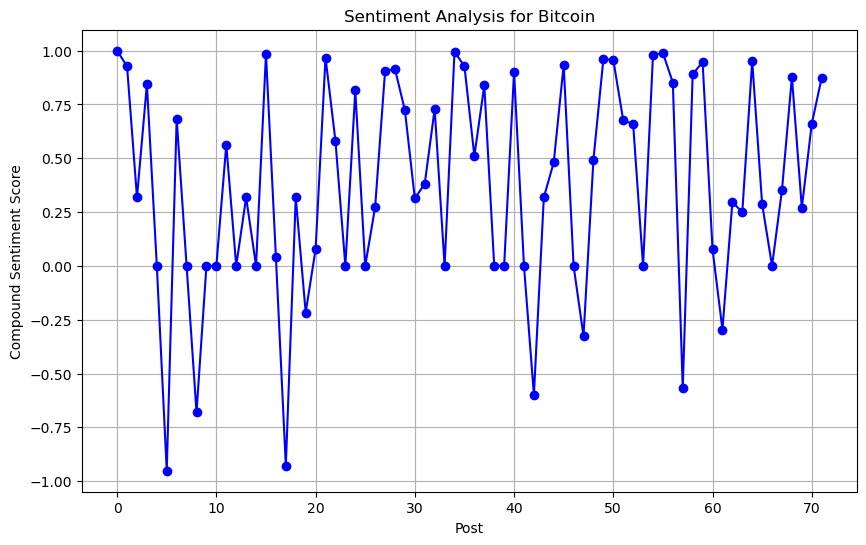

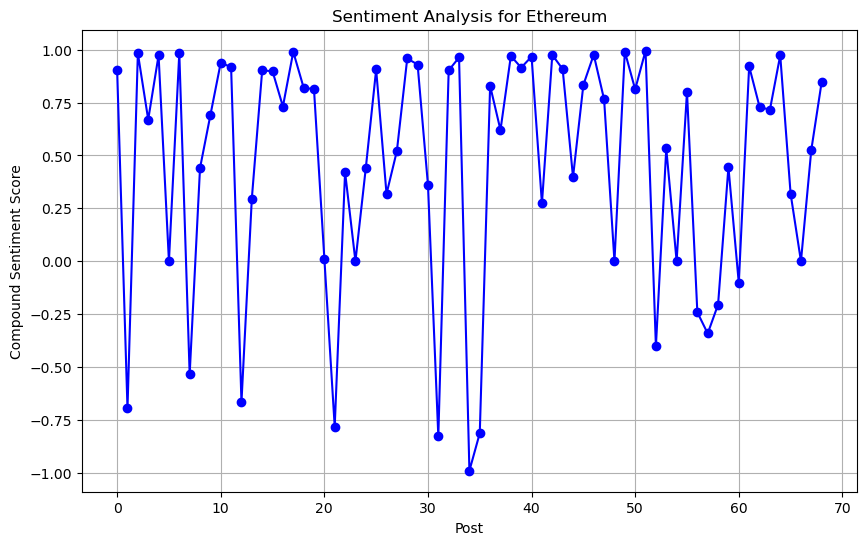

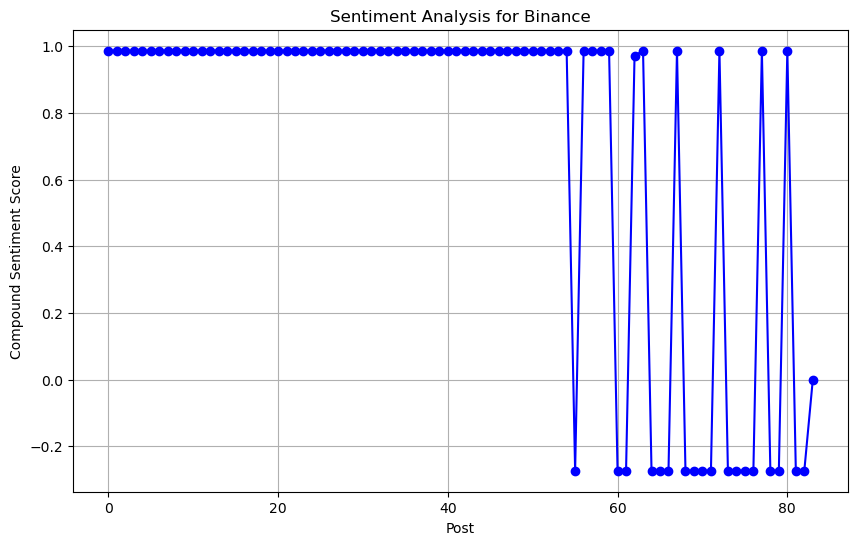

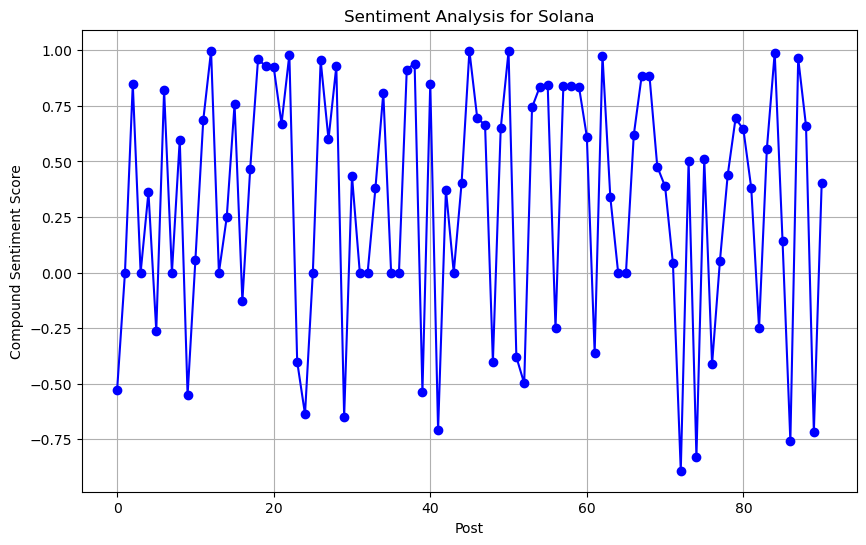

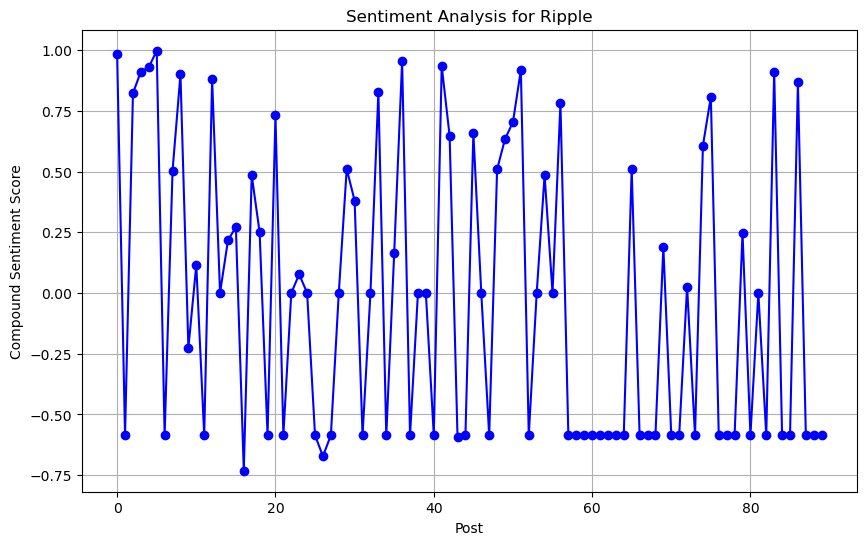

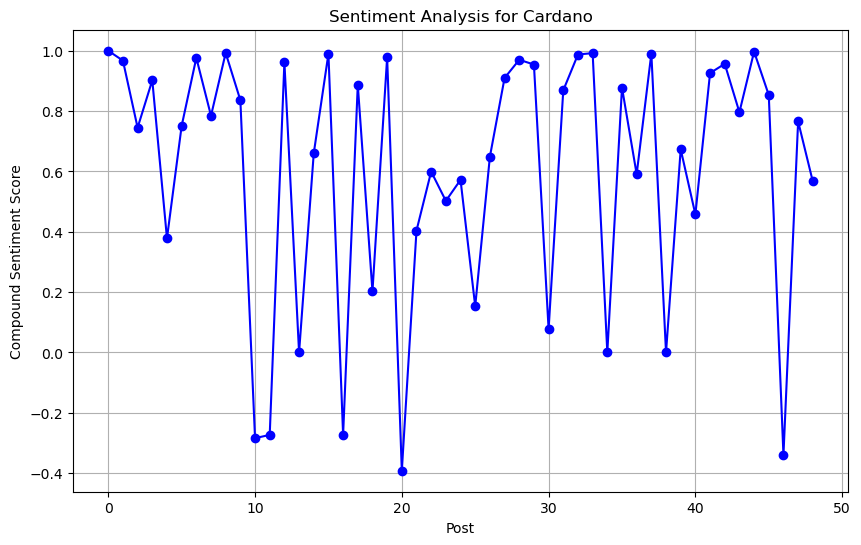

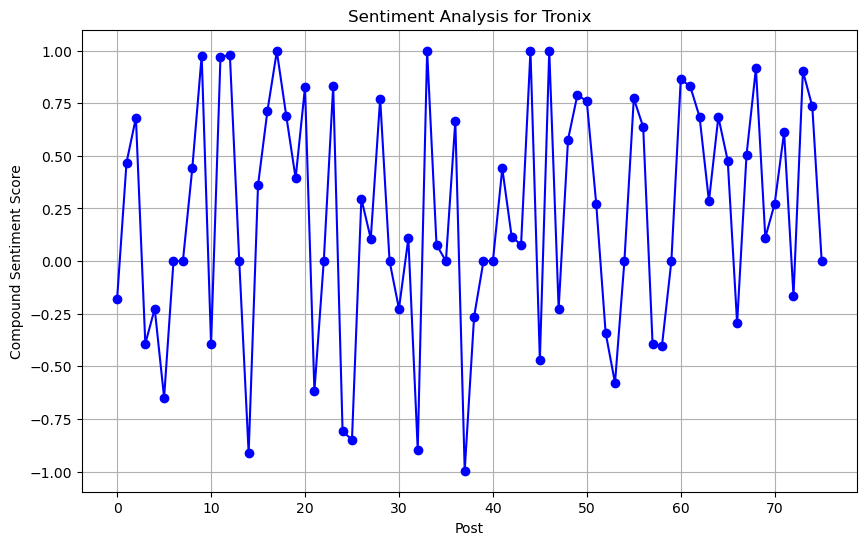

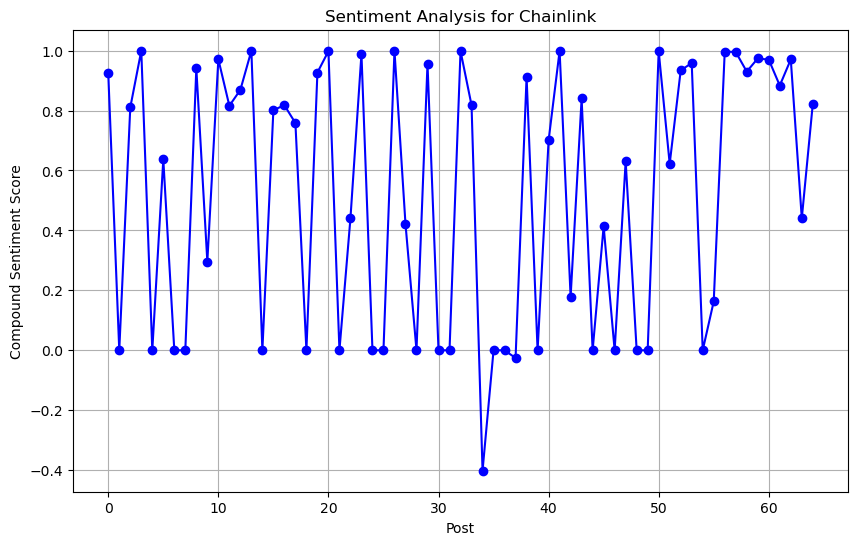

In [27]:
# Function to plot sentiment scores for a cryptocurrency
def plot_sentiment_scores(sentiment_scores, name):
    # Extract compound scores
    compound_scores = [score['compound'] for score in sentiment_scores]
    # Plot compound scores
    plt.figure(figsize=(10, 6))
    plt.plot(compound_scores, marker='o', linestyle='-', color='b')
    plt.title(f'Sentiment Analysis for {name}')
    plt.xlabel('Post')
    plt.ylabel('Compound Sentiment Score')
    plt.grid(True)
    plt.show()

# Plot sentiment scores for each cryptocurrency
plot_sentiment_scores(sentiment_scores_cryptocurrency, "Cryptocurrency")
plot_sentiment_scores(sentiment_scores_cryptomarkets, "Crypto Markets")
plot_sentiment_scores(sentiment_scores_bitcoin, "Bitcoin")
plot_sentiment_scores(sentiment_scores_eth, "Ethereum")
plot_sentiment_scores(sentiment_scores_binance, "Binance")
plot_sentiment_scores(sentiment_scores_solana, "Solana")
plot_sentiment_scores(sentiment_scores_ripple, "Ripple")
plot_sentiment_scores(sentiment_scores_cardano, "Cardano")
plot_sentiment_scores(sentiment_scores_tronix, "Tronix")
plot_sentiment_scores(sentiment_scores_chainlink, "Chainlink")

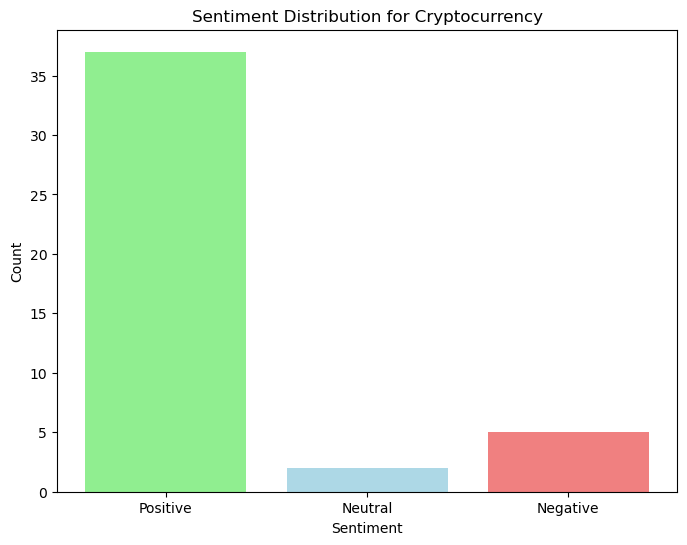

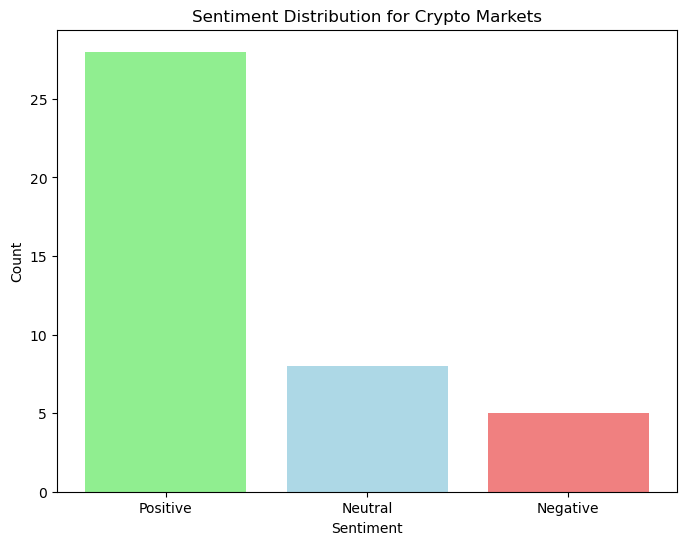

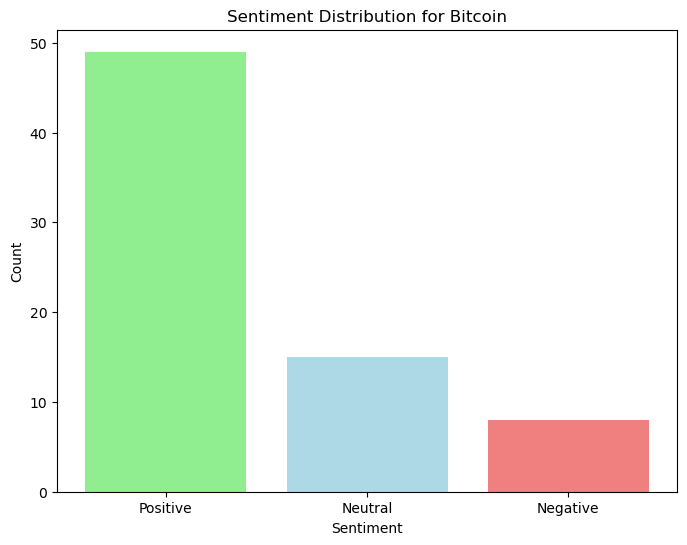

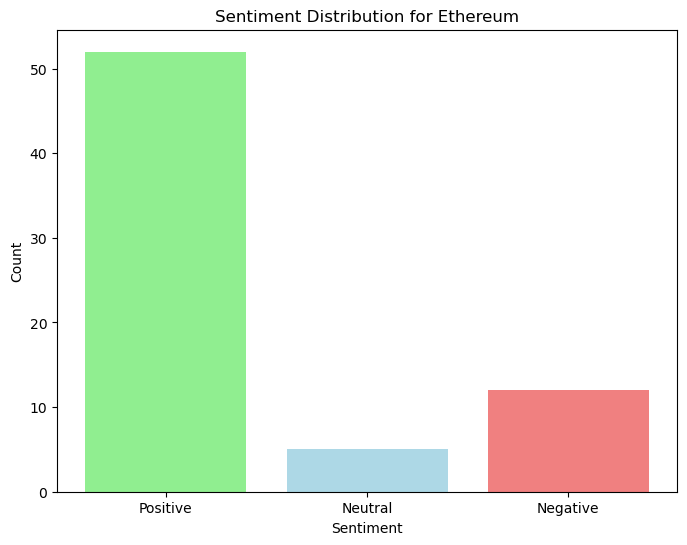

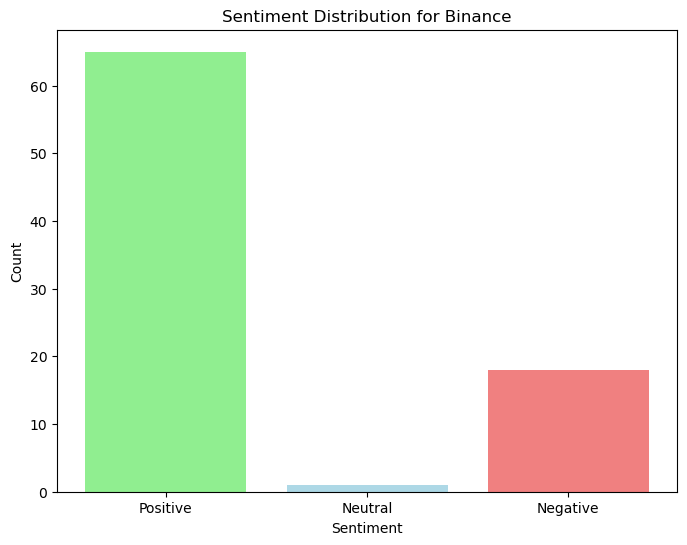

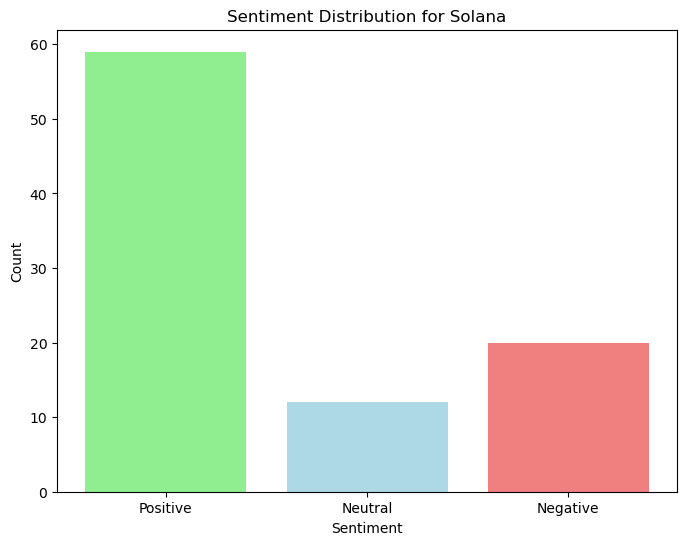

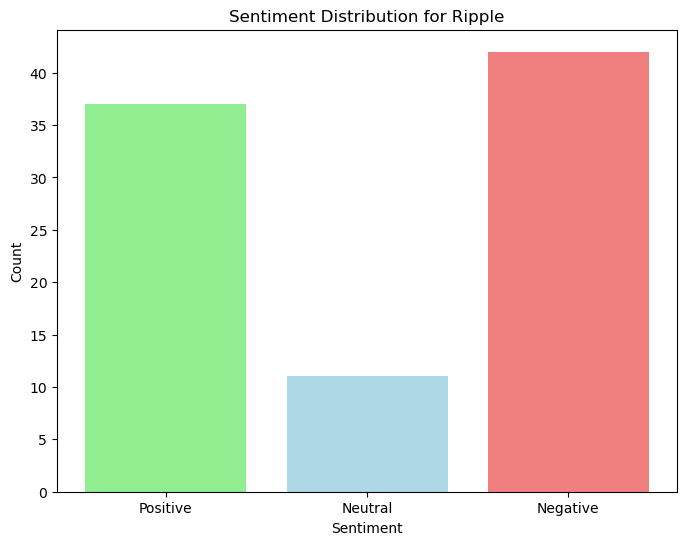

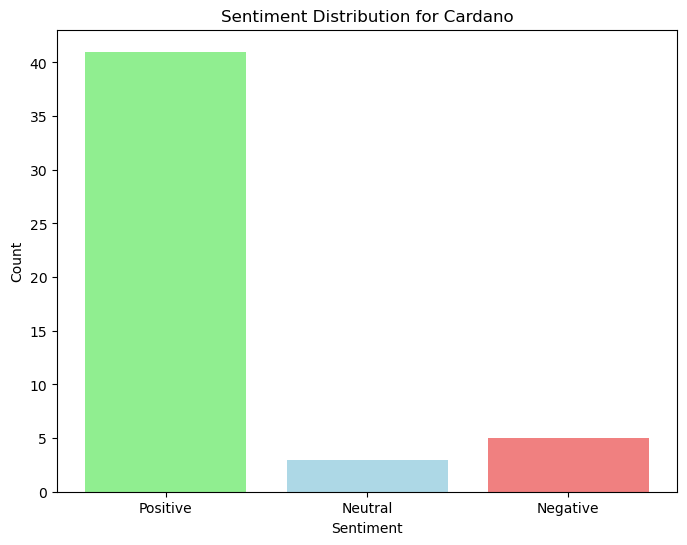

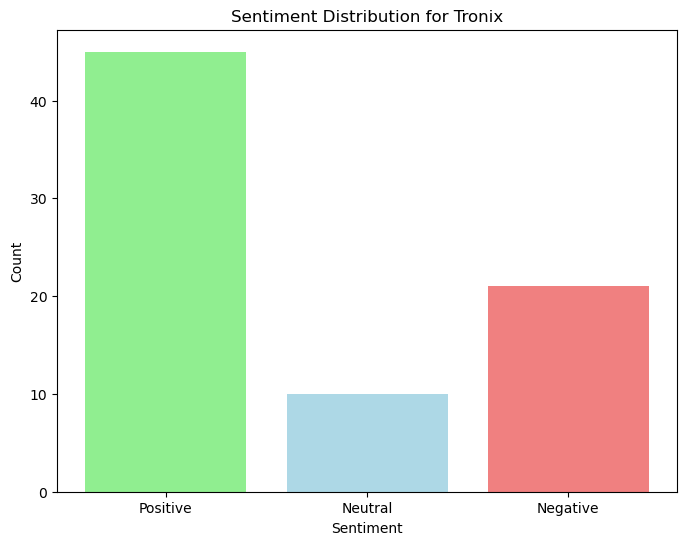

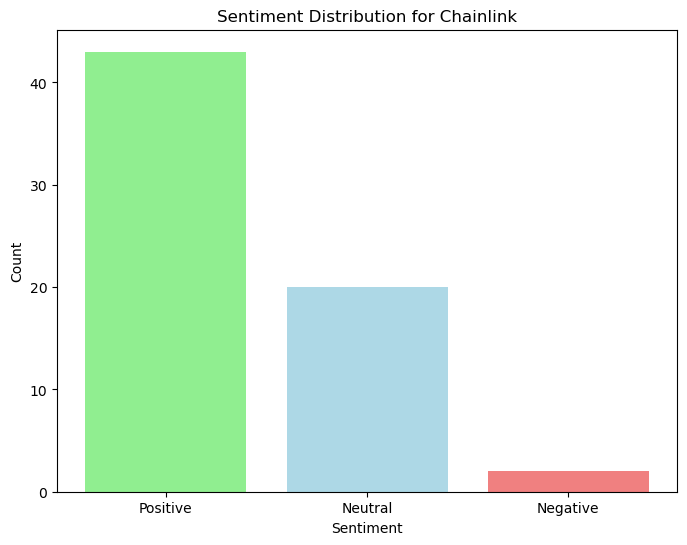

In [28]:
# Function to plot sentiment distribution for a cryptocurrency
def plot_sentiment_distribution(sentiment_scores, name):
    # Initialize counts
    positive_count = sum(1 for score in sentiment_scores if score['compound'] > 0)
    neutral_count = sum(1 for score in sentiment_scores if score['compound'] == 0)
    negative_count = sum(1 for score in sentiment_scores if score['compound'] < 0)
    
    # Plot
    labels = ['Positive', 'Neutral', 'Negative']
    counts = [positive_count, neutral_count, negative_count]
    colors = ['lightgreen', 'lightblue', 'lightcoral']

    plt.figure(figsize=(8, 6))
    plt.bar(labels, counts, color=colors)
    plt.title(f'Sentiment Distribution for {name}')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.show()

# Plot sentiment distribution for each cryptocurrency
plot_sentiment_distribution(sentiment_scores_cryptocurrency, "Cryptocurrency")
plot_sentiment_distribution(sentiment_scores_cryptomarkets, "Crypto Markets")
plot_sentiment_distribution(sentiment_scores_bitcoin, "Bitcoin")
plot_sentiment_distribution(sentiment_scores_eth, "Ethereum")
plot_sentiment_distribution(sentiment_scores_binance, "Binance")
plot_sentiment_distribution(sentiment_scores_solana, "Solana")
plot_sentiment_distribution(sentiment_scores_ripple, "Ripple")
plot_sentiment_distribution(sentiment_scores_cardano, "Cardano")
plot_sentiment_distribution(sentiment_scores_tronix, "Tronix")
plot_sentiment_distribution(sentiment_scores_chainlink, "Chainlink")

## Combining the Data

In [ ]:
cryptocurrency = reddit_api.get_crypto_curr_data()
cryptomarkets = reddit_api.get_crypto_markets_data()
bitcoin = reddit_api.get_bitcoin_data()
eth= reddit_api.get_eth_data()
binance = reddit_api.get_binance_data()
solana = reddit_api.get_solana_data()
ripple = reddit_api.get_ripple_data()
cardano = reddit_api.get_cardano_data()
tronix = reddit_api.get_tronix_data()
chainlink = reddit_api.get_chainlink_data()

In [30]:
combined_df = pd.concat([cryptocurrency,cryptomarkets,bitcoin,
                             eth, binance, solana,
                             ripple,cardano, tronix,chainlink
                              ], axis=0)

In [31]:
combined_df.head(5)

,thread_id,subreddit,title,body,upvote_ratio,ups,downs,score
0,t3 _ 1daraxx,CryptoCurrency,[AMA] RCC MarketCap – Your One-Stop Shop for A...,***^(HEADS UP – anyone who comments will be en...,0.63,29,0,29
1,t3 _ 1dapntv,CryptoCurrency,Poll - Which site do you use (most often) to t...,"\n\nWhen you're watching your $Moon bag, or ma...",0.60,5,0,5
5,t3 _ 1dazz95,CryptoCurrency,People could really do with understanding the ...,I’ve noticed with yesterday’s market dip (and ...,0.84,37,0,37
8,t3 _ 1dax82t,CryptoCurrency,Any idea which blockchain would be used in a T...,Larry Fink (Blackrock CEO) mentioning a future...,0.70,30,0,30
9,t3 _ 1db5lzy,CryptoCurrency,Why bitcoin mining is good - and why it isn’t,"Sabine is not a crypto person, and I like her ...",0.69,6,0,6


In [33]:
combined_df["cleaned_body"] = combined_df['body'].apply(tokenize_and_remove_stopwords)
    # Flatten the list of tokenized words
#flattened_tokens = [word for sublist in tokenized_bodies for word in sublist]
combined_df.head(5)

,thread_id,subreddit,title,body,upvote_ratio,ups,downs,score,cleaned_body
0,t3 _ 1daraxx,CryptoCurrency,[AMA] RCC MarketCap – Your One-Stop Shop for A...,***^(HEADS UP – anyone who comments will be en...,0.63,29,0,29,"[heads, anyone, comments, entered, raffle, win..."
1,t3 _ 1dapntv,CryptoCurrency,Poll - Which site do you use (most often) to t...,"\n\nWhen you're watching your $Moon bag, or ma...",0.60,5,0,5,"[watching, moon, bag, maybe, found, token, ric..."
5,t3 _ 1dazz95,CryptoCurrency,People could really do with understanding the ...,I’ve noticed with yesterday’s market dip (and ...,0.84,37,0,37,"[noticed, yesterday, market, dip, quite, hones..."
8,t3 _ 1dax82t,CryptoCurrency,Any idea which blockchain would be used in a T...,Larry Fink (Blackrock CEO) mentioning a future...,0.70,30,0,30,"[larry, fink, blackrock, ceo, mentioning, futu..."
9,t3 _ 1db5lzy,CryptoCurrency,Why bitcoin mining is good - and why it isn’t,"Sabine is not a crypto person, and I like her ...",0.69,6,0,6,"[sabine, crypto, person, like, take, making, e..."
